<a href="https://colab.research.google.com/github/pratikshakaklij/Artificial_Intelligence_Assignment_All/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## use case : Bulid an ANN model that predicts the power engergy for powerplant based data.independent features: sensor readings related to powerplant machine

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


AT : ATMOSPHERIC TEMP
V:VACCUM
AP: ATMOSPHERIC Pressure
RH: RELATIVE HUMIDITY
PE: POWER ENERGY

## perform basic data quality check

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [9]:
df.duplicated().sum()

np.int64(41)

In [10]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
df = df.drop_duplicates()

In [12]:
df.describe()

,AT,V,AP,RH,PE
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


## separate data into x and y
x = all features
y = power energy

In [13]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [15]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [16]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data preprosessing and data cleaning

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [29]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()).set_output(transform = 'pandas')

In [30]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [33]:

x_pre = num_pipeline.fit_transform(X)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## # Train test split

In [40]:
from sklearn.model_selection import train_test_split
xtrain , xtest,ytrain,ytest = train_test_split(x_pre,Y,train_size=0.85,random_state=21)

In [41]:
print(xtrain.shape , xtest.shape ,ytrain.shape , ytest.shape)

(8097, 4) (1430, 4) (8097,) (1430,)


### Scenario 1: Target variable `Y` is a pandas Series

If you select a single column using `df['column_name']`, pandas returns a Series. When `train_test_split` processes a Series, the resulting `ytrain` and `ytest` will also be Series, and their `.shape` will be `(number_of_rows,)`.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is available from previous cells
# Create Y as a Series
Y_series = df['PE']

xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(X, Y_series, train_size=0.85, random_state=21)

print(f"Shape when Y is a Series: ytrain_s.shape={ytrain_s.shape}, ytest_s.shape={ytest_s.shape}")
print(f"Type of ytrain_s: {type(ytrain_s)}")

### Scenario 2: Target variable `Y` is a single-column pandas DataFrame

If you select a single column using `df[['column_name']]`, pandas returns a DataFrame (even if it only has one column). When `train_test_split` processes a single-column DataFrame, the resulting `ytrain` and `ytest` will often remain DataFrames, and their `.shape` will be `(number_of_rows, 1)`.

In your current notebook, you defined `Y = df[['PE']]`, which is a single-column DataFrame. However, `train_test_split` in some scikit-learn versions or contexts can still flatten a single-column DataFrame into a Series for the target, leading to the `(rows,)` output you observed. It's good practice to be aware of this potential behavior.

Let's explicitly check this:

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is available from previous cells
# Create Y as a single-column DataFrame
Y_dataframe = df[['PE']]

xtrain_df, xtest_df, ytrain_df, ytest_df = train_test_split(X, Y_dataframe, train_size=0.85, random_state=21)

print(f"Shape when Y is a DataFrame: ytrain_df.shape={ytrain_df.shape}, ytest_df.shape={ytest_df.shape}")
print(f"Type of ytrain_df: {type(ytrain_df)}")

As you can see, the way you define `Y` (as a Series vs. a single-column DataFrame) can influence the output shape from `train_test_split`. Both are generally acceptable for most machine learning models, but it's good to be aware of the underlying data structure.

## Artifical Neural Network Model Buliding

In [49]:
from keras.models import Sequential
from keras.layers import Dense


In [50]:
xtrain.shape

(8097, 4)

In [52]:
xtrain.shape[1]

4

In [54]:
model = Sequential()

# add the input layer by specifying input_shape in the first Dense layer
model.add(Dense(units=8, activation='relu', input_shape=(xtrain.shape[1],)))

# add the hidden layer2
model.add(Dense(units=4, activation='relu'))

# add the output layer
model.add(Dense(units=1, activation='linear'))

##

In [55]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [57]:
neural_network = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 206841.2969 - mae: 454.4907 - val_loss: 205860.9844 - val_mae: 453.4141
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 203801.3281 - mae: 451.1344 - val_loss: 197663.4531 - val_mae: 444.2330
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192546.1094 - mae: 438.3342 - val_loss: 174169.5938 - val_mae: 416.4920
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164244.8750 - mae: 403.9228 - val_loss: 132448.5000 - val_mae: 361.1194
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120036.6641 - mae: 342.0519 - val_loss: 85223.0000 - val_mae: 282.6631
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74815.4453 - mae: 261.0123 - val_loss: 49248.3359 - val_mae: 201.7332
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43279.0078 - mae: 186.1517 - val_loss: 30999.4316 - val_mae: 152.7425
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29257.8906 - mae: 148

## plot the learing curve


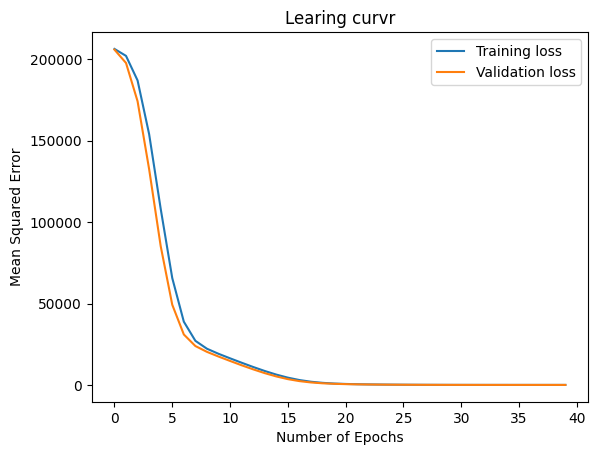

In [58]:
import matplotlib.pyplot as plt
plt.plot(neural_network.history['loss'],label='Training loss')
plt.plot(neural_network.history['val_loss'],label='Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learing curvr")
plt.show()



## this mean overfitting
traing loss : low
testing loss: high